# Mempool Bitcoin
The mempool is where all valid transactions wait to be confirmed by the Bitcoin network. A high number of transactions in the mempool indicates a congested traffic which will result in longer average confirmation time and higher priority fees.

In [97]:
import numpy as np 
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')
%matplotlib inline

In [98]:
mem_pool_count = pd.read_csv('mempool-count.csv')
mem_pool_count

,Timestamp,mempool-count
0,2016-06-14 15:45:00,25286.5
1,2016-06-15 19:15:00,30871.5
2,2016-06-16 22:45:00,9736.0
3,2016-06-18 02:15:00,6933.0
4,2016-06-19 05:45:00,3586.0
...,...,...
1489,2021-02-14 22:00:00,43397.5
1490,2021-02-16 01:30:00,46126.0
1491,2021-02-17 05:00:00,52213.0
1492,2021-02-18 08:30:00,63110.0


In [99]:
mem_pool_count['Timestamp'] = pd.to_datetime(mem_pool_count['Timestamp'])

In [100]:
mem_pool_count = mem_pool_count.rename(columns={'Timestamp':'Date'})
mem_pool_count.head()

,Date,mempool-count
0,2016-06-14 15:45:00,25286.5
1,2016-06-15 19:15:00,30871.5
2,2016-06-16 22:45:00,9736.0
3,2016-06-18 02:15:00,6933.0
4,2016-06-19 05:45:00,3586.0


In [101]:
mem_pool_count['Date'] = pd.to_datetime(mem_pool_count['Date']).dt.date
mem_pool_count

,Date,mempool-count
0,2016-06-14,25286.5
1,2016-06-15,30871.5
2,2016-06-16,9736.0
3,2016-06-18,6933.0
4,2016-06-19,3586.0
...,...,...
1489,2021-02-14,43397.5
1490,2021-02-16,46126.0
1491,2021-02-17,52213.0
1492,2021-02-18,63110.0


In [102]:
mem_pool_count = mem_pool_count.set_index('Date')
mem_pool_count

,mempool-count
Date,
2016-06-14,25286.5
2016-06-15,30871.5
2016-06-16,9736.0
2016-06-18,6933.0
2016-06-19,3586.0
...,...
2021-02-14,43397.5
2021-02-16,46126.0
2021-02-17,52213.0


In [103]:
mem_pool_count.describe()

,mempool-count
count,1494.000000
mean,17318.122155
std,26091.963674
min,3.000000
25%,2620.500000
50%,6727.500000
75%,19754.250000
max,179500.000000


Text(0.5, 1.0, 'Unconfirmed Transaction Count Bitcoin Mempool')

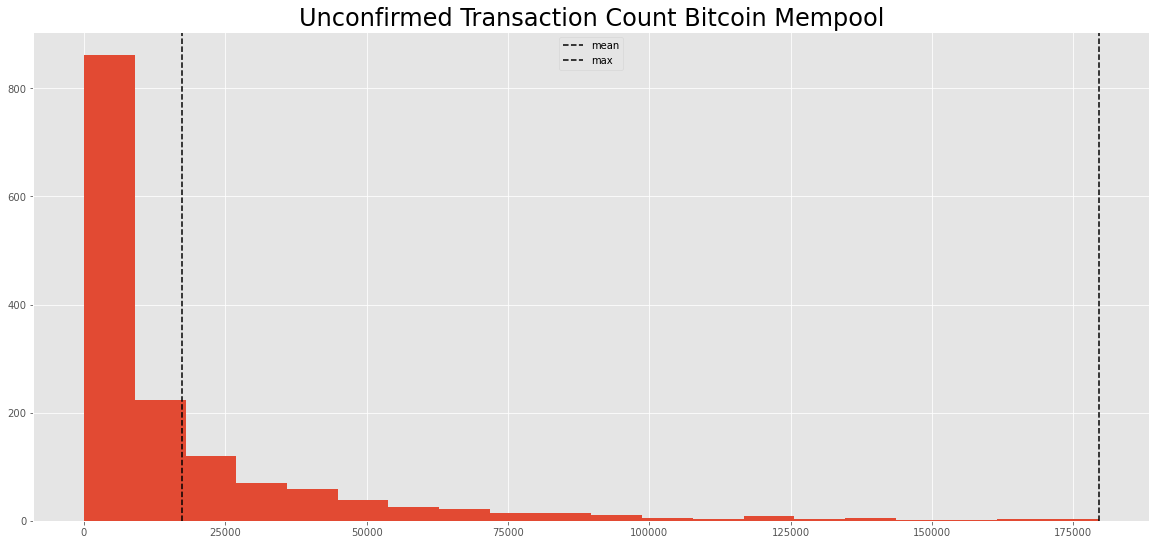

In [104]:
mem_pool_count.hist(bins=20, figsize=(20,9))
plt.axvline(x=mem_pool_count['mempool-count'].mean(), color = 'black', label = 'mean', linestyle = 'dashed')
plt.axvline(x=179500.000000, color = 'black', label = 'max', linestyle = 'dashed')
plt.legend()
plt.title('Unconfirmed Transaction Count Bitcoin Mempool', fontsize=24)

Text(0.5, 1.0, 'Unconfirmed Transaction Count Bitcoin Mempool')

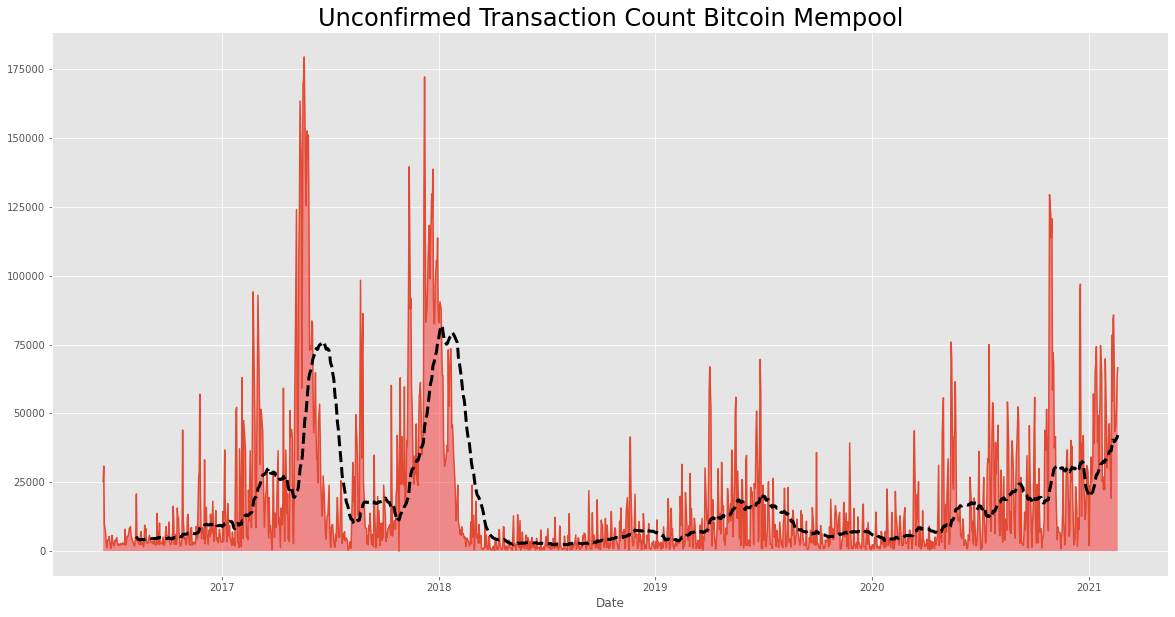

In [105]:
f, ax = plt.subplots(figsize=(20,10))

mem_pool_count['mempool-count'].plot()
mem_pool_count['mempool-count'].rolling(50).mean().plot(color = 'black', lw=3, linestyle = "dashed")
ax.fill_between(mem_pool_count.index, mem_pool_count['mempool-count'],  facecolor ='red', alpha = 0.4) 
plt.title('Unconfirmed Transaction Count Bitcoin Mempool', fontsize=24)


In [106]:
#import hist. btc data since 

btc = web.DataReader('BTC-USD', data_source = 'yahoo', start='2016-06-15')
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-14,696.302979,672.560974,685.684998,694.468994,9.922380e+07,694.468994
2016-06-15,773.721985,696.523010,696.523010,766.307983,2.716340e+08,766.307983
2016-06-16,775.356018,716.556030,768.487000,748.908997,3.633210e+08,748.908997
2016-06-17,777.989990,733.929016,748.755981,756.226990,2.527180e+08,756.226990
2016-06-18,766.620972,745.627991,756.687988,763.781006,1.361850e+08,763.781006
...,...,...,...,...,...,...
2021-02-15,48875.570312,46347.476562,48696.535156,47945.058594,7.706990e+10,47945.058594
2021-02-17,52533.914062,49072.378906,49207.277344,52149.007812,8.082055e+10,52149.007812
2021-02-18,52474.105469,51015.765625,52140.972656,51679.796875,5.205472e+10,51679.796875


In [107]:
mem_pool_count = mem_pool_count.join(btc['Close'], how="inner")
mem_pool_count

,mempool-count,Close
Date,,
2016-06-14,25286.5,694.468994
2016-06-15,30871.5,766.307983
2016-06-16,9736.0,748.908997
2016-06-18,6933.0,763.781006
2016-06-19,3586.0,737.226013
...,...,...
2021-02-12,85781.5,47504.851562
2021-02-14,43397.5,48717.289062
2021-02-17,52213.0,52149.007812


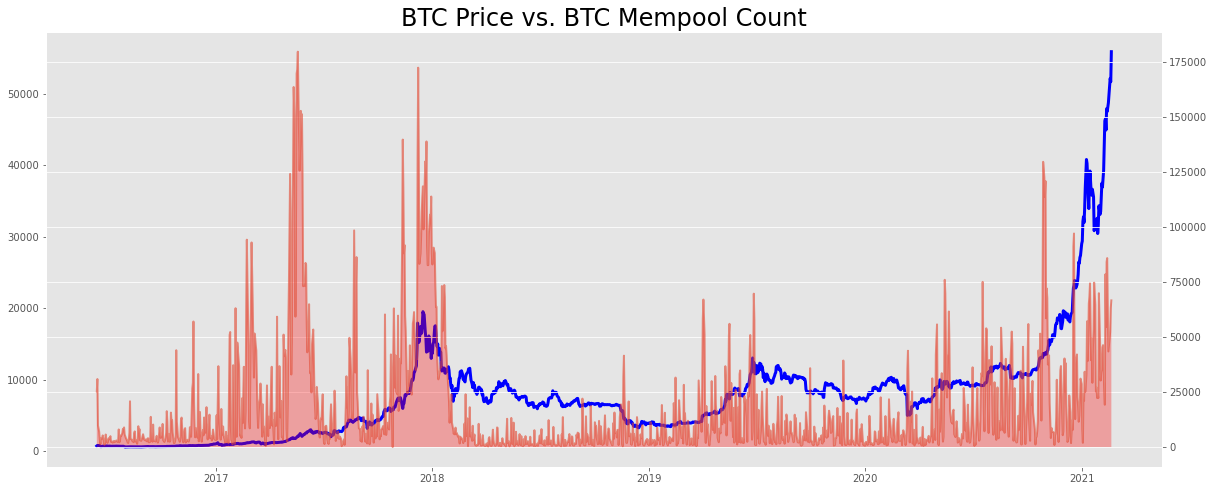

In [112]:
f, ax = plt.subplots(figsize=(20,8))

ax.plot(mem_pool_count['Close'], color = 'blue', lw=3, label = 'BTC Price')
ax.grid(False)
ax = ax.twinx()
# ax.plot(df1['fng_value'], alpha=0.6, lw = 2)
ax.plot(mem_pool_count['mempool-count'], alpha=.6, lw =2, label = 'Mempool Transaction Count')
ax.fill_between(mem_pool_count.index, mem_pool_count['mempool-count'],  facecolor ='red', alpha = .3) 

ax.set_title('BTC Price vs. BTC Mempool Count', fontsize=24)

plt.show()

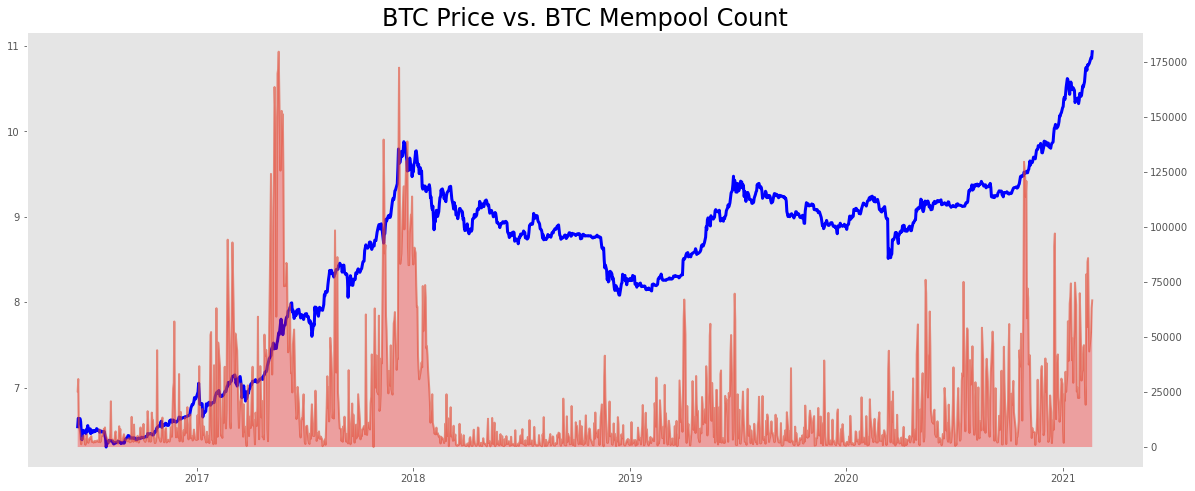

In [113]:
f, ax = plt.subplots(figsize=(20,8))

ax.plot(mem_pool_count['Close'].apply(np.log), color = 'blue', lw=3, label = 'BTC Price')
ax.grid(False)
ax = ax.twinx()
# ax.plot(df1['fng_value'], alpha=0.6, lw = 2)
ax.plot(mem_pool_count['mempool-count'], alpha=.6, lw =2, label = 'Mempool Transaction Count')
ax.fill_between(mem_pool_count.index, mem_pool_count['mempool-count'],  facecolor ='red', alpha = .3) 


ax.set_title('BTC Price vs. BTC Mempool Count', fontsize=24)
ax.grid(False)
plt.show()